- 高维的数据可能非常稀疏，大多数实例可能相互间距离很远
- 数据维度越高，越可能过拟合
- 降维主要用于训练加速，也可用于数据可视化
- 降维会损失部分信息，但也可能过滤掉噪音和不必要的细节，导致更高的性能
- 两种主要的降维方法：投影和 `Manifold Learning`
    - 最流行的降维技巧：`SVD,PCA,Kernel PCA,LLE`
    


# 主成分分析`(PCA)`
最小化原始数据和其投影间的均方距离

In [13]:
#Principal Component Analysis,PCA
import numpy as np
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
import scipy
import matplotlib.pyplot as plt

data = load_iris()
x = data['data']
y = data['target']

#1.数据标准化
x_s = scale(x, with_mean=True, with_std=True, axis=0)

#2.相关矩阵
x_c = np.corrcoef(x_s.T)

#3.特征值及特征向量
eig_value, eig_vec = scipy.linalg.eig(x_c)
print('Eigen values \n%s' % (eig_value))
print('Eigen vector \n%s' % (eig_vec))

#4.选择大的特征值对应的特征向量，并将数据投影
w = eig_vec[:, 0:2]
x_rd = x_s.dot(w)
print(w)

Eigen values 
[2.91849782+0.j 0.91403047+0.j 0.14675688+0.j 0.02071484+0.j]
Eigen vector 
[[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]
[[ 0.52106591 -0.37741762]
 [-0.26934744 -0.92329566]
 [ 0.5804131  -0.02449161]
 [ 0.56485654 -0.06694199]]


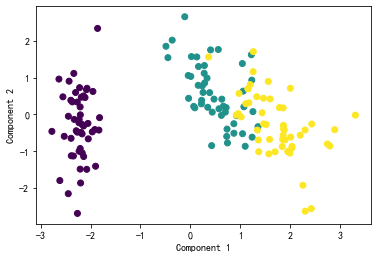

In [14]:
plt.figure(1)
plt.scatter(x_rd[:, 0], x_rd[:, 1], c=y)
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()

In [15]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
x2d = pca.fit_transform(x)
print(x2d[:5])

print(pca.components_.T) # 各个主成分

print(pca.explained_variance_ratio_) # 各个主成分轴导致的方差占比
# 92.5% 的方差是沿着第一轴，5.3% 的方差是沿着第二轴

[[-2.68412563  0.31939725]
 [-2.71414169 -0.17700123]
 [-2.88899057 -0.14494943]
 [-2.74534286 -0.31829898]
 [-2.72871654  0.32675451]]
[[ 0.36138659  0.65658877]
 [-0.08452251  0.73016143]
 [ 0.85667061 -0.17337266]
 [ 0.3582892  -0.07548102]]
[0.92461872 0.05306648]


In [16]:
# 选择合理的维度，使得降维后方差占原始数据总方差的 95% 以上
pca = PCA()
pca.fit(x)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

pca = PCA(n_components=d)
x_reduced = pca.fit_transform(x)
pca

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

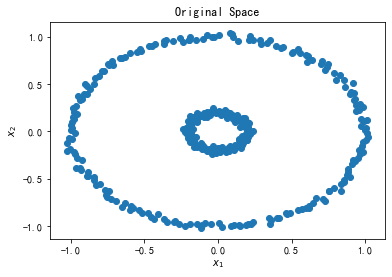

In [7]:
# Kernel PCA
# 将数据映射到更高维的空间
from sklearn.datasets import make_circles
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA, KernelPCA

np.random.seed(0)
x, y = make_circles(n_samples=400, factor=0.2, noise=0.02)
plt.close('all')
plt.figure(1)
plt.title('Original Space')
plt.scatter(x[:, 0], x[:, 1])
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.show()

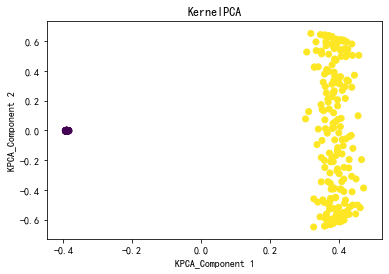

In [8]:
# rbf kernel
kpca = KernelPCA(kernel='rbf', gamma=10)
kpca.fit(x)
x_kpca = kpca.transform(x)
plt.figure(4)
plt.title('KernelPCA')
plt.scatter(x_kpca[:, 0], x_kpca[:, 1], c=y)
plt.xlabel('KPCA_Component 1')
plt.ylabel('KPCA_Component 2')
plt.show()

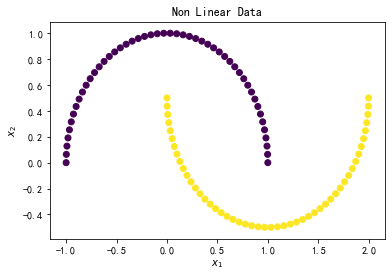

In [10]:
from sklearn.datasets import make_moons
x, y = make_moons(100)
plt.figure(5)
plt.title('Non Linear Data')
plt.scatter(x[:, 0], x[:, 1], c=y)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.show()

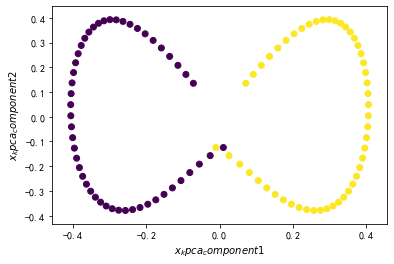

In [11]:
# rbf kernel 
kpca = KernelPCA(kernel='rbf', gamma=10)
kpca.fit(x)
x_kpca = kpca.transform(x)
plt.figure(6)
plt.scatter(x_kpca[:, 0], x_kpca[:, 1], c=y)
plt.xlabel('$x_kpca_component 1$')
plt.ylabel('$x_kpca_component 2$')
plt.show()

In [17]:
# PCA 用于压缩
# 重构后（先压缩再解压）的数据与原始数据间的均方距离，称为重构误差
pca = PCA(n_components=2)
x_reduced = pca.fit_transform(x)  # 降维后的数据，损失部分信息
x_recovered = pca.inverse_transform(x_reduced)  # 降维后的数据再还原为原始数据结构
(x_recovered - x)[:5]  # 压缩后及前的数据偏差

array([[-0.01696103,  0.01741393,  0.00321372,  0.01353169],
       [-0.1537381 ,  0.15749994,  0.06356177,  0.04024592],
       [ 0.00411871, -0.0043184 ,  0.00821697, -0.02481985],
       [ 0.0422117 , -0.04303303, -0.03867019,  0.03973218],
       [ 0.07175511, -0.07344514, -0.03626155, -0.00300009]])

In [ ]:
# Incremental PCA
# 将数据拆分成小批次，然后一批一批输入到模型
from sklearn.decomposition import IncrementalPCA
n_batches = 100
inc_pca = IncrementalPCA(n_components=4)
for x_batch in np.array_split(x, n_batches):
    inc_pca.partial_fit(x_batch)  # 此时要 partial_fit()方法
x_reduced = inc_pca.transform(x)

In [ ]:
# 配合 Numpy 的 memmap 类，每次只加载需要的批次数据到内存
x_mm = np.memmap(filename, dtype="float32", mode='readonly', shape=(m, n))
batch_size = m // n_batches
inc_pca = IncrementalPCA(n_components=154, batch_size=batch_size)
inc_pca.fit(x_mm)

# 奇异值分解`(SVD)`
$$X=U*Σ*V^T$$
$U$ 为所有主成分

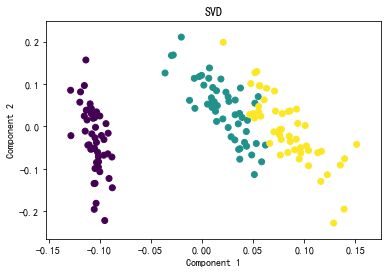

In [12]:
# Singular Value Decomposition
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from scipy.linalg import svd

data = load_iris()
x = data['data']
y = data['target']

x_s = scale(x, with_mean=True, with_std=False, axis=0)
U, S, V = svd(x_s, full_matrices=False)

# U 即为 x_t 的近似
x_t = U[:, :2]
plt.figure(7)
plt.scatter(x_t[:, 0], x_t[:, 1], c=y)
plt.title('SVD')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()

# LLE
- `Locally Linear Embedding: nonlinear dimensionality reduction (NLDR) technique`
    - 对每个训练实例 $x^{i}$，查找 $k$ 个最近邻
    - 重构该实例 $x^{i}$ 为其最近邻的线性组合，计算权重$w_{i,j}$ 使得均方距离最小化
    $$W=argmin\sum_{i=1}^m||x^{(i)}-\sum_{j=1}^kw_{i,j}x^{(j)}||^2$$
$$subject\ to\ \sum_{j=1}^kw_{i,j}=1$$
    - $z_{(i)}$ 是 $x_{(i)}$ 在 $d$ 维空间的投影，求出该向量，并保存与其最近邻的相关关系
    $$W=argmin\sum_{i=1}^m||z^{(i)}-\sum_{j=1}^kw_{i,j}z^{(j)}||^2$$

In [ ]:
from sklearn.manifold import LocallyLinearEmbedding
lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10)
x_reduced = lle.fit_transform(x)
x_reduced[:4]

# 其它降维方法
- `Multidimensional Scaling (MDS)`，降维的同时保存实例间的距离
        
         
- `Isomap`，将实例与其最近邻连接成图，降维的同时保存实例间的地理距离
        
         
- `t-Distributed Stochastic Neighbor Embedding (t-SNE)`，降维的同时，使相似数据靠近，不显示数据原理。主要用于可视化，特别是可视化高维数据的 `cluster`
         
          
- `Linear Discriminant Analysis (LDA) `，其实为分类算法，但在训练时会学习类之间最优识别力的轴，这些轴可以用来定义超平面来映射数据